In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [3]:
df=pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv')

In [4]:
# First Five rows of the data
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
# Summary Statistics
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [7]:
# Checking for missing values
df.isnull().sum()
# Data has no missing values

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [8]:
# Co-relation DataFrame
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,NaN,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,NaN,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,NaN,-0.264168,0.042302
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,NaN,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,NaN,-0.365267,1.000000


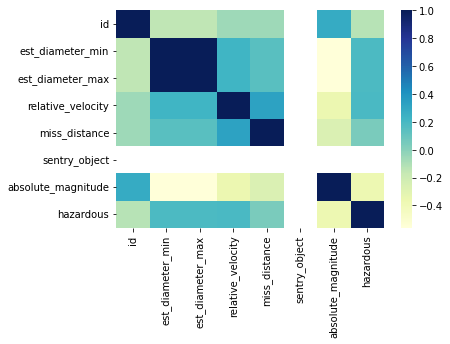

In [9]:
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [10]:
df.drop(columns=['sentry_object','orbiting_body'],inplace=True)

In [11]:
df.select_dtypes(include=np.number).drop(columns='id').columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

In [12]:
nums=['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'] 
# Numerical columns

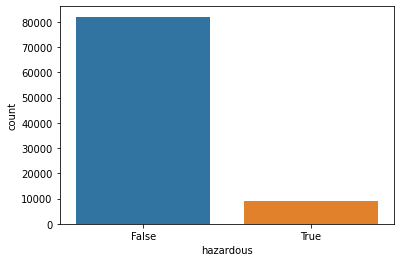

In [13]:
sns.countplot(x='hazardous',data=df)
plt.show()

***THERE ARE A LOT MORE NON-HAZARDOUS THAN HAZARDOUS***

In [14]:
# Extracting year from name to see later on whether we could have a paatern
df[['drop','work']]=df.name.str.split('(',expand=True)

In [15]:
# Dropping the unnecessary extra column we made
df.drop(columns='drop',inplace=True)

In [16]:
def year_extract(x):
    return x.strip()[0:x.strip().index(' ')]
df['year']=df['work'].apply(year_extract)

In [17]:
df['year'].unique()

array(['2000', '2005', '2015', '2012', '2014', '2021', '2001', '2016',
       '2020', '2022', '2017', '2018', '2019', '2003', '2006', '2013',
       '1994', '1998', '1978', '1984', '1980', '2007', '2009', '2011',
       '1991', '2004', '2002', '2010', '1990', '2008', '1999', '1993',
       '1997', '1995', '1951', '1950', '1996', '1986', '1992', '1987',
       '1971', '1989', '1960', '1982', '1953', 'A911', '1976', '1973',
       '1936', '1988', '1977', '1937', '1985', '1948', '6743', '1983',
       'A898', '1949', '1974', '1932', '1972', '4788', '6344', '1968',
       '1981', '1979', 'A924', '1947', '1959', '1975', '1929', 'A/2019',
       '1963'], dtype=object)

In [18]:
# [A911,6743,A898,4788,6344,A924,A/2019] --> Years to be changed 

In [19]:
df.loc[df.year=='A911','year']='1911' 
df.loc[df.year=='6743','year']='1960'
df.loc[df.year=='A898','year']='1898'
df.loc[df.year=='6344','year']='1960'
df.loc[df.year=='A924','year']='1924'
df.loc[df.year=='A/2019','year']='2019'
df.loc[df.year=='4788','year']='1960'

In [20]:
df.year.unique()

array(['2000', '2005', '2015', '2012', '2014', '2021', '2001', '2016',
       '2020', '2022', '2017', '2018', '2019', '2003', '2006', '2013',
       '1994', '1998', '1978', '1984', '1980', '2007', '2009', '2011',
       '1991', '2004', '2002', '2010', '1990', '2008', '1999', '1993',
       '1997', '1995', '1951', '1950', '1996', '1986', '1992', '1987',
       '1971', '1989', '1960', '1982', '1953', '1911', '1976', '1973',
       '1936', '1988', '1977', '1937', '1985', '1948', '1983', '1898',
       '1949', '1974', '1932', '1972', '1968', '1981', '1979', '1924',
       '1947', '1959', '1975', '1929', '1963'], dtype=object)

In [21]:
df.year=df.year.astype(int) 
# Converting into int to check distribution

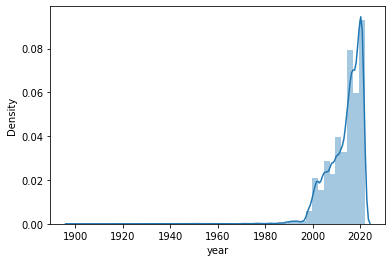

In [22]:
sns.distplot(df.year)
plt.show()

In [23]:
# Dropping the extra column we made
df.drop(columns=['work'],inplace=True)

***Hazardous objects were mostly discovered between around 2002 to before 2020***

In [24]:
# Dropping more unnecessary columns as they have no effect on hazardous
df.drop(columns=['id','name'],inplace=True)

In [25]:
# Replacing True with 1 and false with 0 in hazardous
df['hazardous'].replace(to_replace=[True,False],value=[1,0],inplace=True)

In [26]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,year
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0,2000
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,2005
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0,2015
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0,2012
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,2014


In [27]:
#Checking co-relation
df.corr()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,year
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.468348
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.468348
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185,-0.128262
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302,-0.101514
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267,0.517477
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000,-0.269807
year,-0.468348,-0.468348,-0.128262,-0.101514,0.517477,-0.269807,1.000000


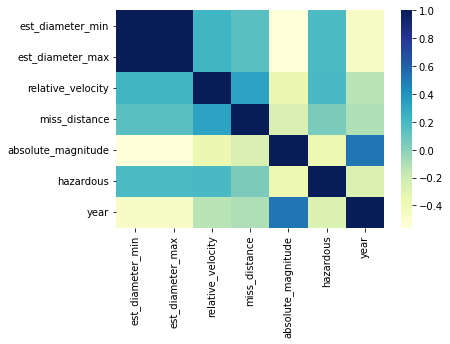

In [28]:
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [29]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df.drop(columns='hazardous')
Y=df.loc[:,'hazardous']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.75)

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
#In graph form, normal distribution will appear as a bell curve.
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
prediction = gnb.predict(X_test)
print(accuracy_score(Y_test,prediction)*100)

89.6869082742525


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,Y_train)
prediction = lr.predict(X_test)
print(accuracy_score(Y_test,prediction)*100)

90.19331542560218


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,Y_train)
prediction =knn.predict(X_test)
print(accuracy_score(Y_test,prediction)*100)

89.3170108767449


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
prediction = rf.predict(X_test)
print(accuracy_score(Y_test,prediction)*100)

94.1609053679158
